In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data = pd.read_csv('/content/Orderdata.csv')
data.head()

,column1,Benefit_per_order,Order_City,Order_Country,Order_Customer_Id,order_date_DateOrders,Order_Id,Order_Item_Cardprod_Id,Order_Item_Discount,Order_Item_Discount_Rate,...,Order_Item_Profit_Ratio,Order_Item_Quantity,Order_Item_Total,Order_Profit_Per_Order,Order_Region,Order_State,Order_Status,Order_Zipcode,Sales,Type
0,0,91.250000,Bekasi,Indonesia,20755,56:00.0,77202,1360,13.110000,0.04,...,0.29,1,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,327.75,DEBIT
1,1,-249.089996,Bikaner,India,19492,27:00.0,75939,1360,16.389999,0.05,...,-0.80,1,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,327.75,TRANSFER
2,2,-247.779999,Bikaner,India,19491,06:00.0,75938,1360,18.030001,0.06,...,-0.80,1,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,327.75,CASH
3,3,22.860001,Townsville,Australia,19490,45:00.0,75937,1360,22.940001,0.07,...,0.08,1,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,327.75,DEBIT
4,4,134.210007,Townsville,Australia,19489,24:00.0,75936,1360,29.500000,0.09,...,0.45,1,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,327.75,PAYMENT


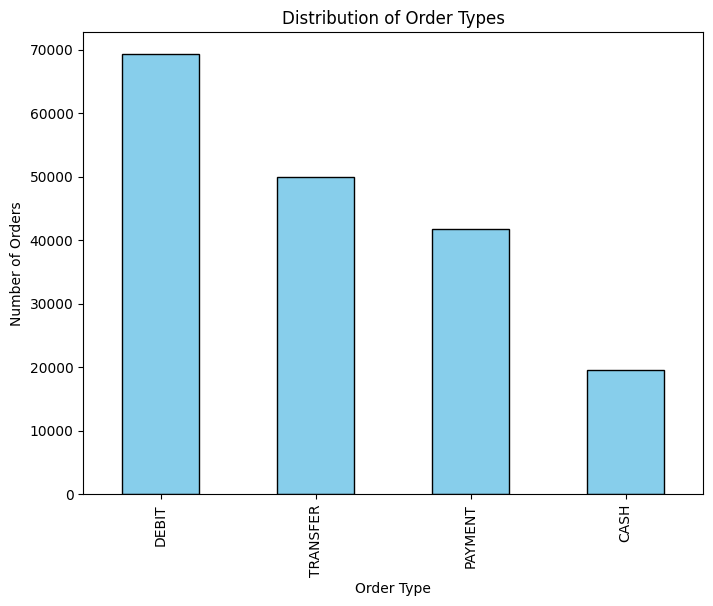

In [30]:
# Plot a histogram for the 'Type' column
plt.figure(figsize=(8, 6))
data['Type'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Order Types')
plt.xlabel('Order Type')
plt.ylabel('Number of Orders')
plt.show()

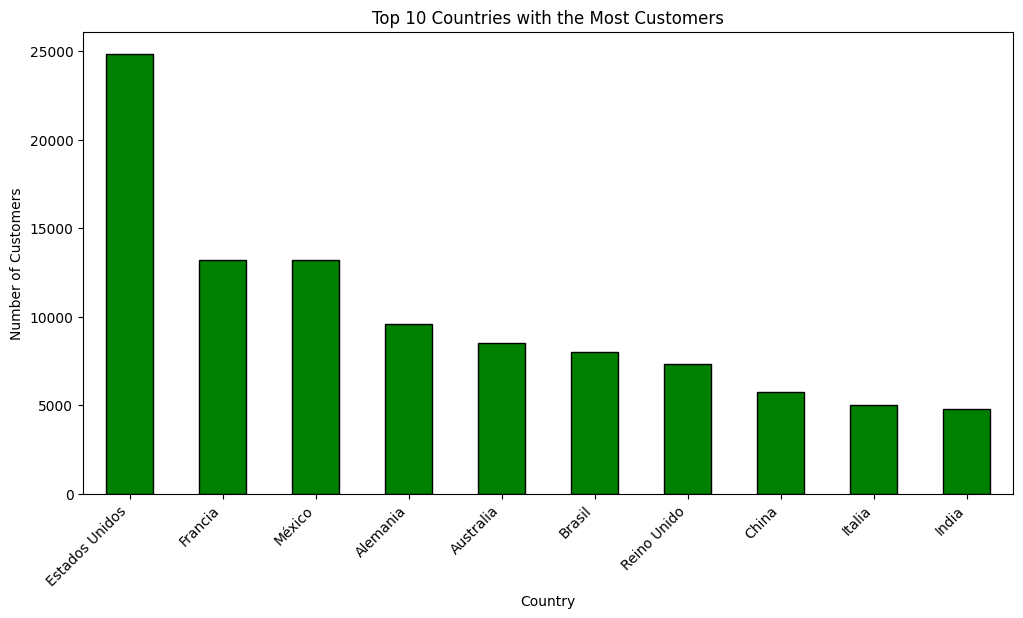

In [32]:
# Plot a bar chart for the top 10 countries with the most customers
top_countries = data['Order_Country'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='green', edgecolor='black')
plt.title('Top 10 Countries with the Most Customers')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.show()

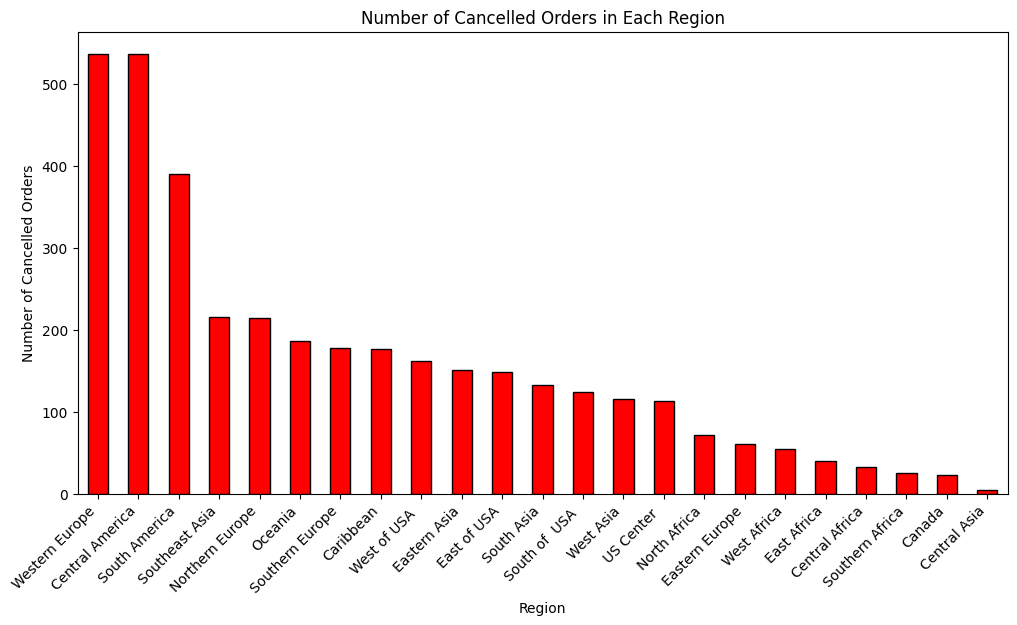

In [37]:
# Filter the DataFrame to include only cancelled orders
cancelled_orders = data[data['Order_Status'] == 'CANCELED']

# Count the number of cancelled orders in each region
cancelled_by_region = cancelled_orders['Order_Region'].value_counts()

# Plot a bar chart
plt.figure(figsize=(12, 6))
cancelled_by_region.plot(kind='bar', color='red', edgecolor='black')
plt.title('Number of Cancelled Orders in Each Region')
plt.xlabel('Region')
plt.ylabel('Number of Cancelled Orders')
plt.xticks(rotation=45, ha='right')
plt.show()

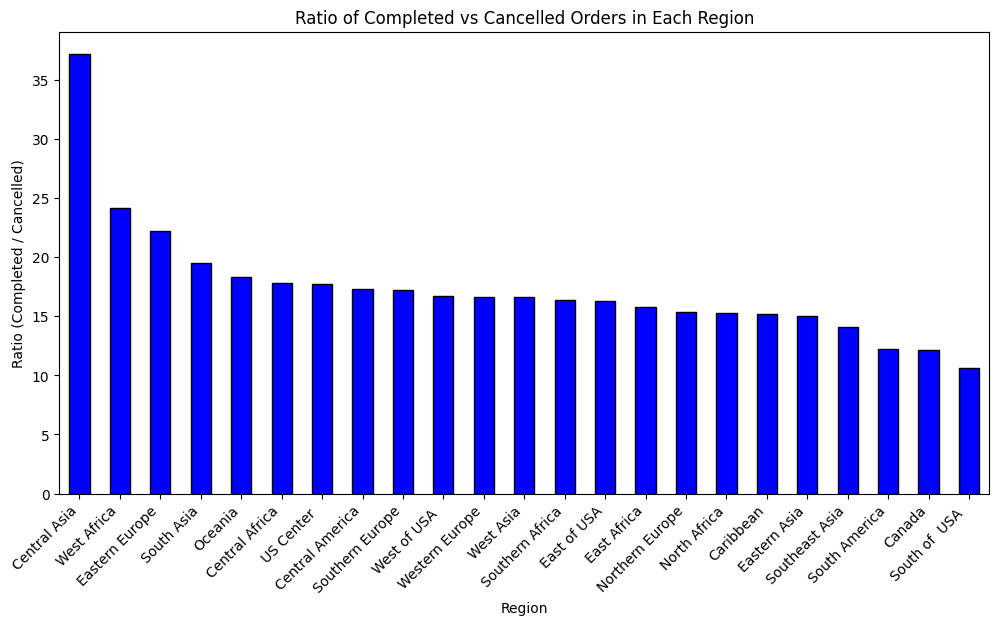

In [39]:
# Count the number of orders for each status in each region
status_by_region = data.groupby(['Order_Region', 'Order_Status']).size().unstack(fill_value=0)

# Calculate the ratio of completed to canceled orders
status_by_region['Ratio'] = status_by_region['COMPLETE'] / status_by_region['CANCELED']

# Plot a bar chart
plt.figure(figsize=(12, 6))
status_by_region['Ratio'].sort_values(ascending=False).plot(kind='bar', color='blue', edgecolor='black')
plt.title('Ratio of Completed vs Cancelled Orders in Each Region')
plt.xlabel('Region')
plt.ylabel('Ratio (Completed / Cancelled)')
plt.xticks(rotation=45, ha='right')
plt.show()

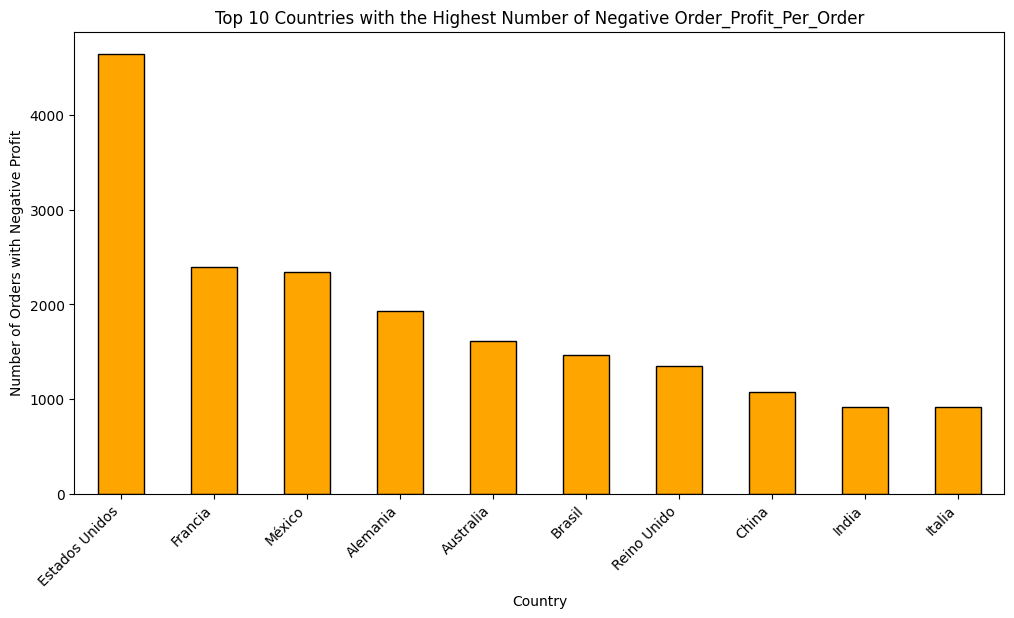

In [40]:
# Filter the DataFrame to include only rows with negative Order_Profit_Per_Order
negative_profit_countries = data[data['Order_Profit_Per_Order'] < 0]

# Count the number of negative Order_Profit_Per_Order in each country
negative_profit_by_country = negative_profit_countries['Order_Country'].value_counts().nlargest(10)

# Plot a bar chart
plt.figure(figsize=(12, 6))
negative_profit_by_country.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Countries with the Highest Number of Negative Order_Profit_Per_Order')
plt.xlabel('Country')
plt.ylabel('Number of Orders with Negative Profit')
plt.xticks(rotation=45, ha='right')
plt.show()

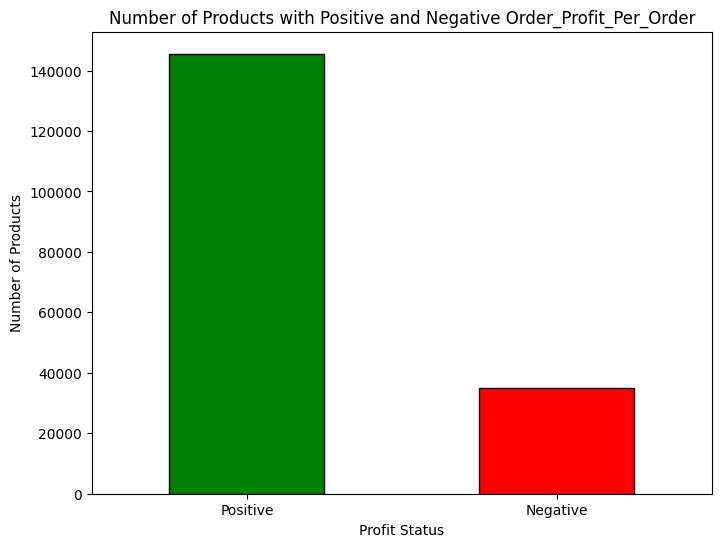

In [42]:
# Count the number of products with positive and negative Order_Profit_Per_Order
profit_status_counts = data['Order_Profit_Per_Order'].apply(lambda x: 'Positive' if x > 0 else 'Negative').value_counts()

# Plot bar chart
plt.figure(figsize=(8, 6))
profit_status_counts.plot(kind='bar', color=['green', 'red'], edgecolor='black')
plt.title('Number of Products with Positive and Negative Order_Profit_Per_Order')
plt.xlabel('Profit Status')
plt.ylabel('Number of Products')
plt.xticks(rotation=0)
plt.show()